In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [2]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage


In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [14]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o")

In [15]:
def multiply(a:int , b:int ) -> int:
  """
  Mutiply two given integers

  Args:
  a : first integer
  b : second integer

  """
  return a * b

In [16]:
llm_with_tools = llm.bind_tools([multiply])

In [17]:
result = llm_with_tools.invoke([HumanMessage(content = "Multiply 3 & 4",name = "JAtin")])

In [18]:
result

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qUYoTAU4oAniMpAkI6JAwCu9', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 63, 'total_tokens': 80, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_9bddfca6e2', 'id': 'chatcmpl-BagstiNAWxE3gobCWSROVaOUJzWtH', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f3bda427-4b2f-46fa-a026-9376bcc9350c-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 4}, 'id': 'call_qUYoTAU4oAniMpAkI6JAwCu9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 63, 'output_tokens': 17, 'total_tokens': 80, 'input_token_details': {'audio': 0, 'cache_rea

In [20]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass


'''will be used to get our texts to be present in conversational history'''

'will be used to get our texts to be present in conversational history'

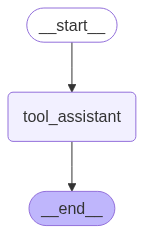

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# NODE

def tool_assistant(state : MessagesState):
  return{"messages": [llm_with_tools.invoke(state["messages"])]}


builder = StateGraph(MessagesState)
builder.add_node("tool_assistant", tool_assistant)
builder.add_edge(START, "tool_assistant")
builder.add_edge("tool_assistant", END)

graph = builder.compile()

graph


In [24]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


In [26]:
messages = graph.invoke({"messages": HumanMessage(content="Get me 2 times 3")})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Get me 2 times 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_UbihTi1Tz5UwK9dYLe6UoTmx)
 Call ID: call_UbihTi1Tz5UwK9dYLe6UoTmx
  Args:
    a: 2
    b: 3
